# Analysis of Football Player Performance

### <font color='green'>Introduction</font>

This report presents an analysis of football (soccer) player performance based on a comprehensive dataset comes from https://www.kaggle.com/datasets/dejoski/soccer-football-dataset-from-whoscored/data?select=WhoScoredFinal1.csv. The dataset includes a wide range of information about players, their teams, and their performance in various tournaments and seasons.

The purpose of this analysis is to gain insights into factors that contribute to player performance and how football has changed over time through the visualization of this dataset with plots and statistics.

In this report, we will focus on an overall analysis of football in general during the period from the 2009/2010 to 2018/2019 season, in some major league in Europe. Then we will go deeper into analyzing the 2018/2019 season and pay attention to the top 5 European national leagues including England(Premier League), France(Ligue 1), Germany(Bundesliga), Italy(Serie A), Spain(LaLiga).

In order to learn how to plot for this report, I have used the resources from the course, ChatGPT, Stackoverlfow, and Youtube (https://www.youtube.com/watch?v=cXtC2EOQj6Q&ab_channel=McKayJohns)

### <font color='green'>Data Loading</font>

First, I will import some necessary libraries

In [27]:
#Indicating the plot is displayed directly below the code cell that produced it
%matplotlib inline
import pandas as pd #pandas is a library with structures and operations to data manipulation 
import matplotlib.pyplot as plt #matplotlib is a library to plotting
import seaborn as sns #seaborn is a library for statistical data visualization
import numpy as np #numpy is a library for mathematical functions


We will read the csv file

In [28]:
df = pd.read_csv('WhoScoredFinal1.csv')
df.head(5)


/var/folders/m6/g6s2c4_n1t59rxk474pzh7200000gn/T/ipykernel_98008/3206539921.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('WhoScoredFinal1.csv')


,ranking,seasonId,seasonName,tournamentId,tournamentRegionId,tournamentRegionCode,tournamentRegionName,regionCode,tournamentName,tournamentShortName,...,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist
0,1,4246,2016,124,247,cint,International,gb-wls,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4246,2016,124,247,cint,International,fr,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4246,2016,124,247,cint,International,hr,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4246,2016,124,247,cint,International,be,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4246,2016,124,247,cint,International,de,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='green'>Data Exploration</font>
Now we will see some basic information of this dataset.

In [29]:
print("\033[91mThe shape of the dataset is: \033[0m", df.shape)
print("\033[91m\nThe columns in the dataset are: \033[0m", df.columns)
print("\033[91m\nThe data types of the columns are: \033[0m", df.dtypes)
print("\033[91m\nDescription of numerical columns: \033[0m", df.describe())
print("\033[91m\nDescription of non-numerical columns: \033[0m", df.describe(include=['object']))


The shape of the dataset is:  (241287, 153)

The columns in the dataset are:  Index(['ranking', 'seasonId', 'seasonName', 'tournamentId',
       'tournamentRegionId', 'tournamentRegionCode', 'tournamentRegionName',
       'regionCode', 'tournamentName', 'tournamentShortName',
       ...
       'keyPassFreekick', 'keyPassThrowin', 'keyPassOther', 'assistCross',
       'assistCorner', 'assistThroughball', 'assistFreekick', 'assistThrowin',
       'assistOther', 'assist'],
      dtype='object', length=153)

The data types of the columns are:  ranking                 int64
seasonId                int64
seasonName             object
tournamentId            int64
tournamentRegionId      int64
                       ...   
assistThroughball     float64
assistFreekick        float64
assistThrowin         float64
assistOther           float64
assist                float64
Length: 153, dtype: object

Description of numerical columns:               ranking       seasonId   tournamentId  tournamen

We will try to see the statistic of one particular player in this dataset

In [30]:
from IPython.display import display #display is a function to display the data
# Define the player, season, and tournament you're interested in
player_name = 'Mohamed Salah'  # replace with the actual player name
season = '2018/2019'  # replace with the actual season name
tournament = 'Premier League'  # replace with the actual tournament name

# Filter the DataFrame
filtered_df = df[(df['name'] == player_name) & (df['seasonName'] == season) & (df['tournamentName'] == tournament)]

# Print the filtered DataFrame
display(filtered_df)

,ranking,seasonId,seasonName,tournamentId,tournamentRegionId,tournamentRegionCode,tournamentRegionName,regionCode,tournamentName,tournamentShortName,...,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist
99977,3,7361,2018/2019,2,252,gb-eng,England,eg,Premier League,EPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100258,3,7361,2018/2019,2,252,gb-eng,England,eg,Premier League,EPL,...,0.0,0.0,1.342105,0.026316,0.026316,0.078947,0.0,0.0,0.105263,0.210526


As we can see, players in each specific season and tournament will have 2 lines to display different statistics and these statistics do not overlap each other. 

### <font color='green'>Data Cleaning and Transformation</font>

First we will remove unnecessary columns because they affect the data filtering process and have no meaning in analysis.

In [31]:
df = df.drop(columns=['ranking', 'isActive', 'isOpta'])

Then we will remove duplicating rows

In [32]:
df = df.drop_duplicates()

Next, because the league in England and Russian both name "Premier League" so we will change the league in Russia to "Russian Premier League"

In [33]:
df.loc[(df['tournamentName'] == 'Premier League') & (df['tournamentRegionName'] == 'Russia'), 'tournamentName'] = 'Russian Premier League'

Finally, we will filter the data. We wanted to keep only the rows where the 'apps' value is the maximum for each group of 'playerId', 'seasonName', and 'tournamentName'. And then we will merge the stats of player in a particular season and tournamnet.

In [34]:
# Filter the dataframe to keep only the rows with the maximum number of apps for each player, season, and tournament
max_apps = df.groupby(['playerId', 'seasonName', 'tournamentName'])['apps'].transform(max)
df = df[df['apps'] == max_apps].reset_index(drop=True)

# Group by 'seasonName', 'tournamentShortName', 'teamName', and 'name', and take the first non-null value for each column
df = df.groupby(['seasonName', 'tournamentShortName', 'teamName', 'name']).first().reset_index()

# Export the DataFrame to a new CSV file in case we need it later
df.to_csv('cleaned_data.csv', index=False)

##### Note: Because we have too many columns in this dataset and also many columns which need to be transformed to numeric so we cannot know exactly which column need to be transformed. So in the process of visualization I will perform the transformation process if it is neccessary

### <font color='green'>Data Analysis</font>
#### Part 1: European football in the period of 2009/2010 to 2018/2019

First, we will take a look at the change in the average rating of player, the total number of goals, the average number of fouls committed by players, the number of penalty cards as well as the number of passes each year during this period in the top 5 leagues in Europe (Premier League, Serie A, Bundesliga, Ligue 1, LaLiga).

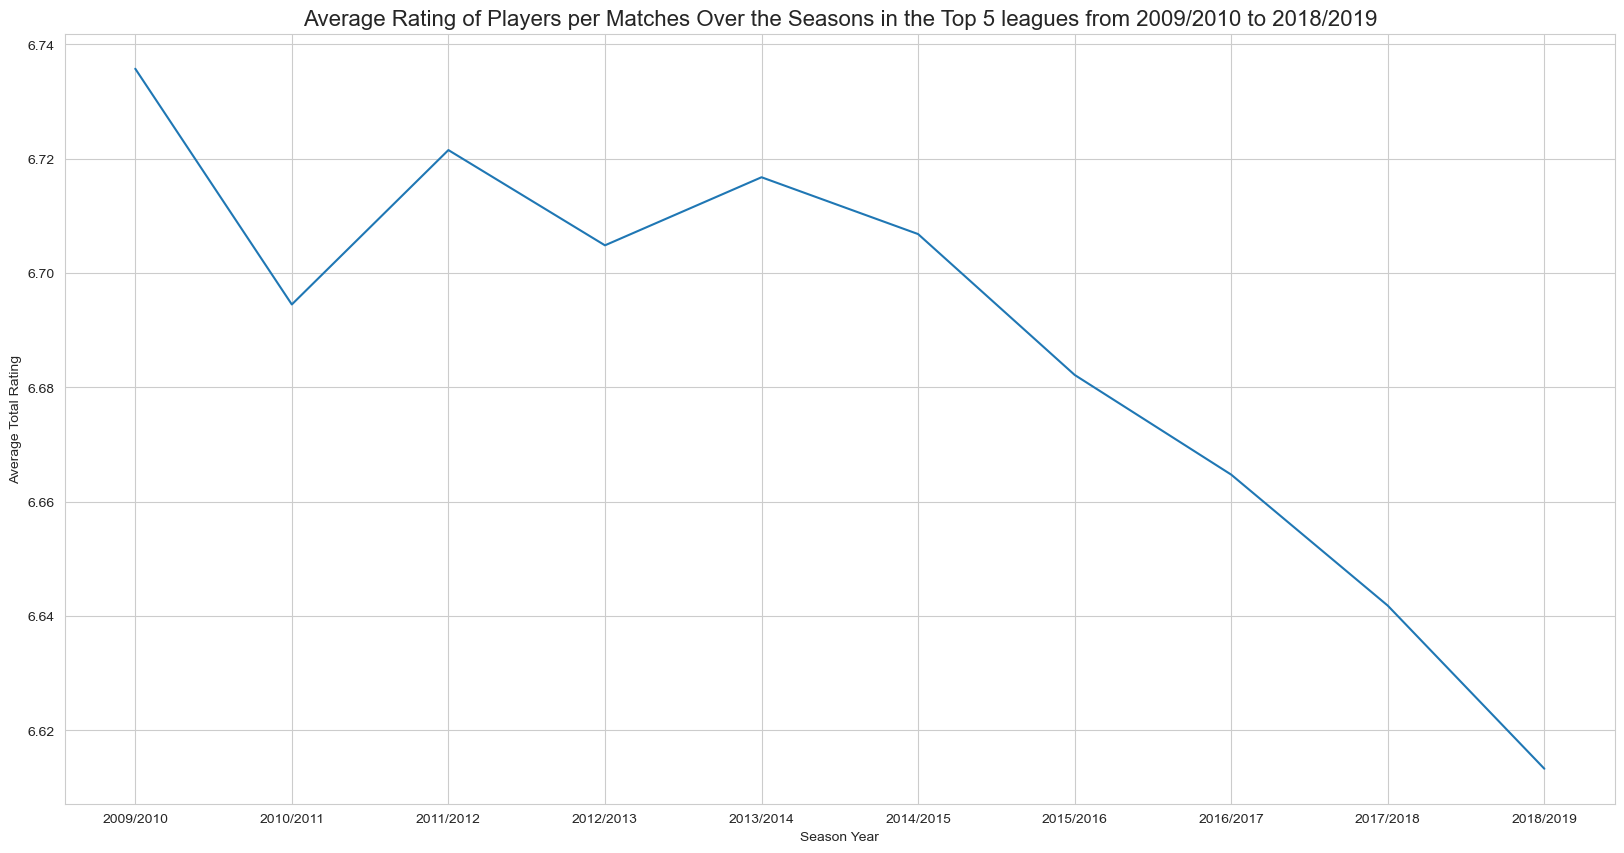

In [35]:

# Define the seasons
seasons = ['2009/2010','2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019']
# Define the top leagues
top_5_leagues = ['Premier League', 'LaLiga', 'Bundesliga', 'Serie A', 'Ligue 1']

# Filter the data for the top leagues
df = df[df['tournamentName'].isin(top_5_leagues)]
df = df[df['seasonName'].isin(seasons)]

df['rating'] = pd.to_numeric(df['rating'])

# Group the data by season_year and calculate the mean total rating
df_grouped = df.groupby(['seasonName'], as_index=False)['rating'].mean()

# Create a line plot with seaborn
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
sns.lineplot(x='seasonName', y='rating', data=df_grouped)
plt.xlabel('Season Year')
plt.ylabel('Average Total Rating')
plt.title('Average Rating of Players per Matches Over the Seasons in the Top 5 leagues from 2009/2010 to 2018/2019', fontsize=16)
plt.show()

- From the plot, it appears that there have been a general downtrend in the average rating of players per matches over these ten seasons. This could suggest a potential decrease in player quality or changes in rating criteria over time.

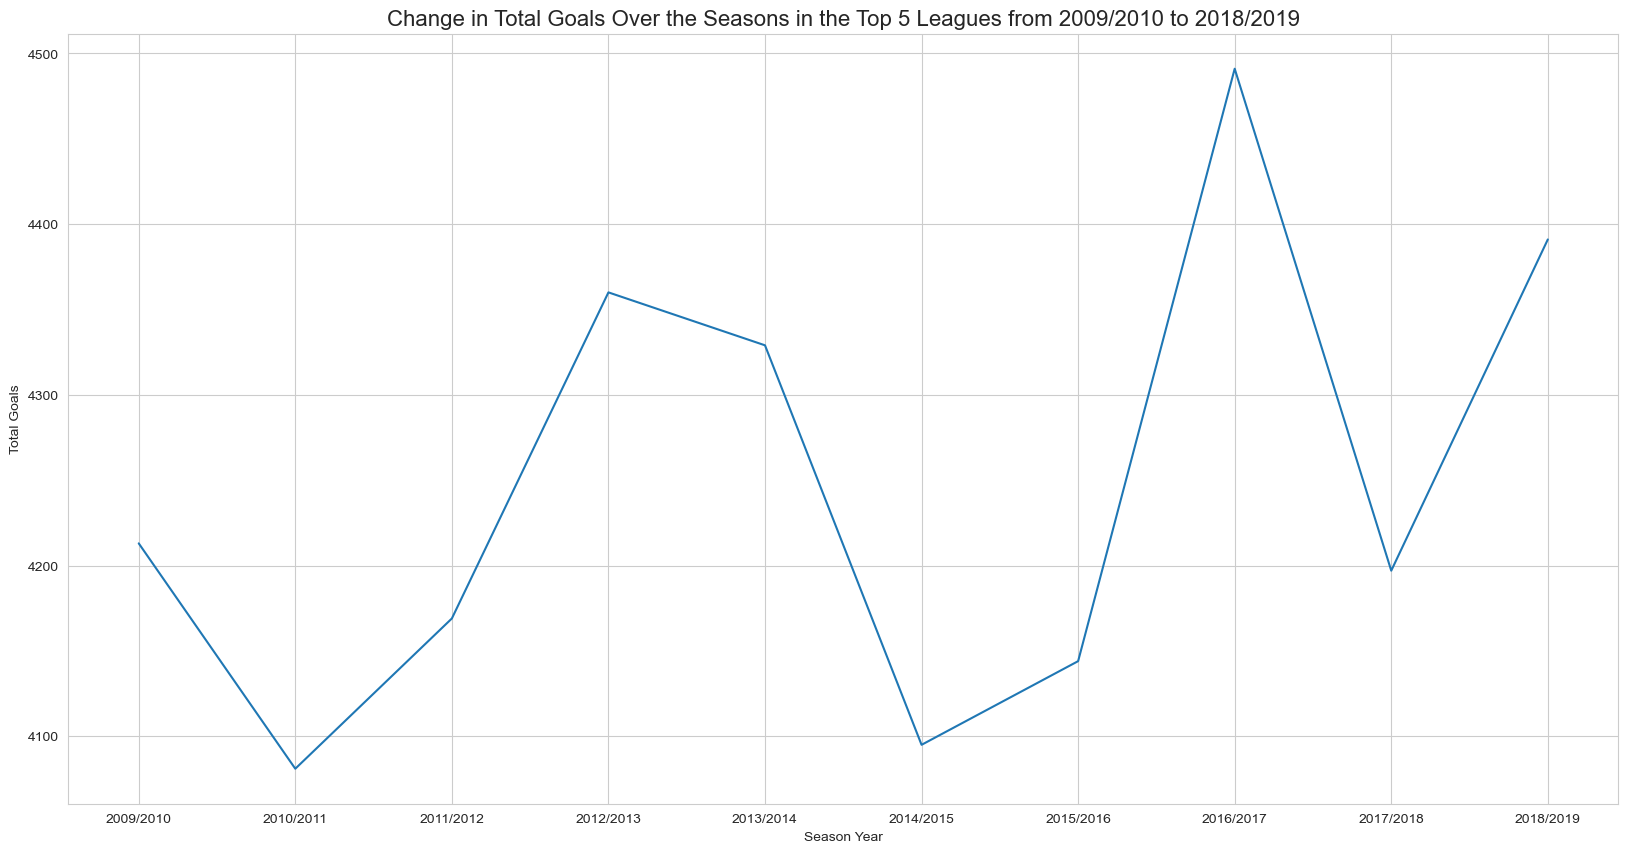

In [36]:
# Group the data by season_year and calculate the total goals
df_grouped = df.groupby(['seasonName'], as_index=False)['goal_x'].sum()

# Create a line plot with seaborn
plt.figure(figsize=(20, 10))
sns.lineplot(x='seasonName', y='goal_x', data=df_grouped)
plt.xlabel('Season Year')
plt.ylabel('Total Goals')
plt.title('Change in Total Goals Over the Seasons in the Top 5 Leagues from 2009/2010 to 2018/2019', fontsize=16)
plt.show()

- From the plot, we can see that there is a fluctuation in the total number of goals scored across different seasons. The total goals range from approximately 4100 to above 4600. There are peaks indicating seasons with a higher goal count such as 2012/2013 and 2016/2017.

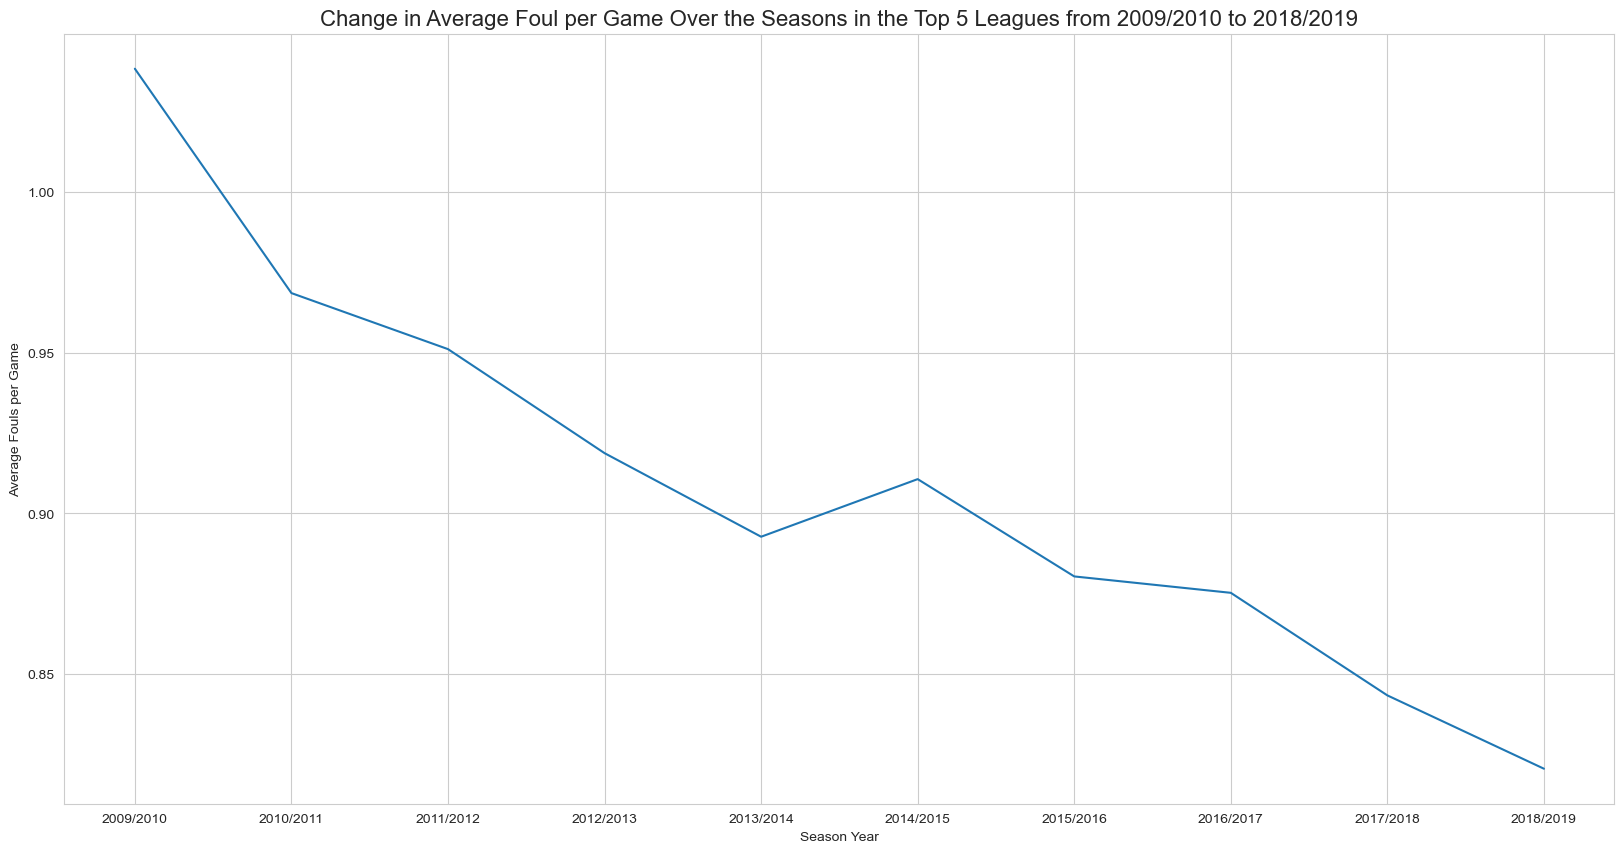

In [37]:
# Convert the datatype of the column to numeric
df['foulCommitted'] = pd.to_numeric(df['foulCommitted'])

# Group the data by season_year and calculate average fouls of player
df_grouped = df.groupby(['seasonName'], as_index=False)['foulCommitted'].mean()

# Create a line plot with seaborn
plt.figure(figsize=(20, 10))
sns.lineplot(x='seasonName', y='foulCommitted', data=df_grouped)
plt.xlabel('Season Year')
plt.ylabel('Average Fouls per Game')
plt.title('Change in Average Foul per Game Over the Seasons in the Top 5 Leagues from 2009/2010 to 2018/2019', fontsize=16)
plt.show()

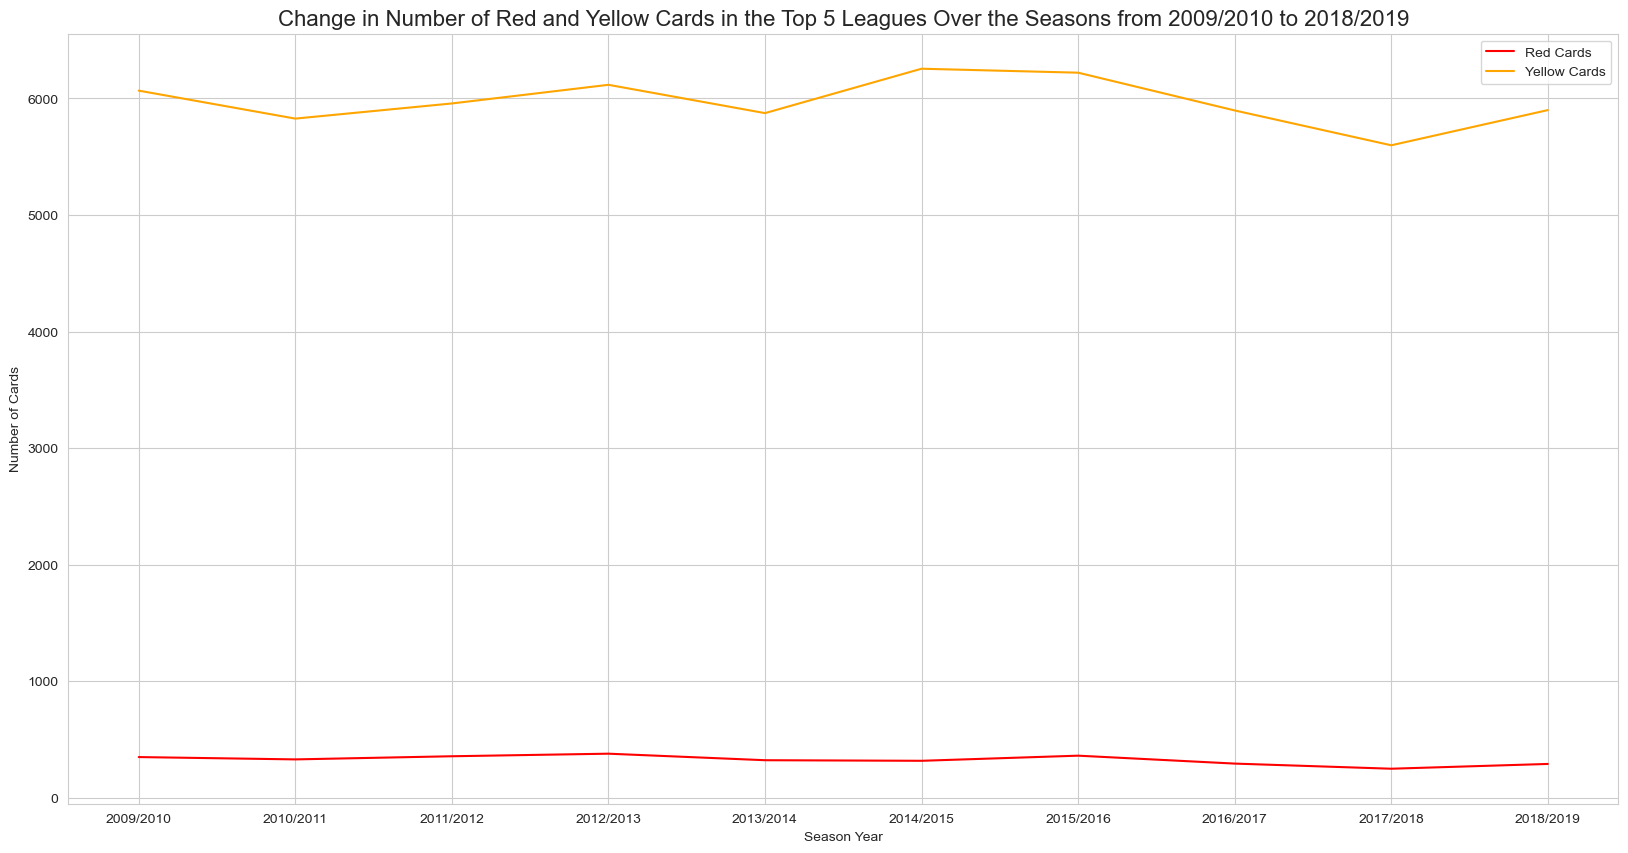

In [38]:
# Group the data by season_year and calculate the total red and yellow cards
df_grouped_red = df.groupby(['seasonName'], as_index=False)['redCard_x'].sum()
df_grouped_yellow = df.groupby(['seasonName'], as_index=False)['yellowCard_x'].sum()


# Create a line plot with seaborn
plt.figure(figsize=(20, 10))
sns.lineplot(x='seasonName', y='redCard_x', data=df_grouped_red, label='Red Cards', color='red')
sns.lineplot(x='seasonName', y='yellowCard_x', data=df_grouped_yellow, label='Yellow Cards', color='orange')
plt.xlabel('Season Year')
plt.ylabel('Number of Cards')
plt.title('Change in Number of Red and Yellow Cards in the Top 5 Leagues Over the Seasons from 2009/2010 to 2018/2019', fontsize=16)
plt.legend()
plt.show()

- We can see that there is a decreasing trend in the average foul per game during this period. This can refer that players became less aggressive during this period and committed fewer fouls. However, the number of yellow card and red card was quite stable, which means that player committed foul, it became more serious or the rules became more strict over the time.

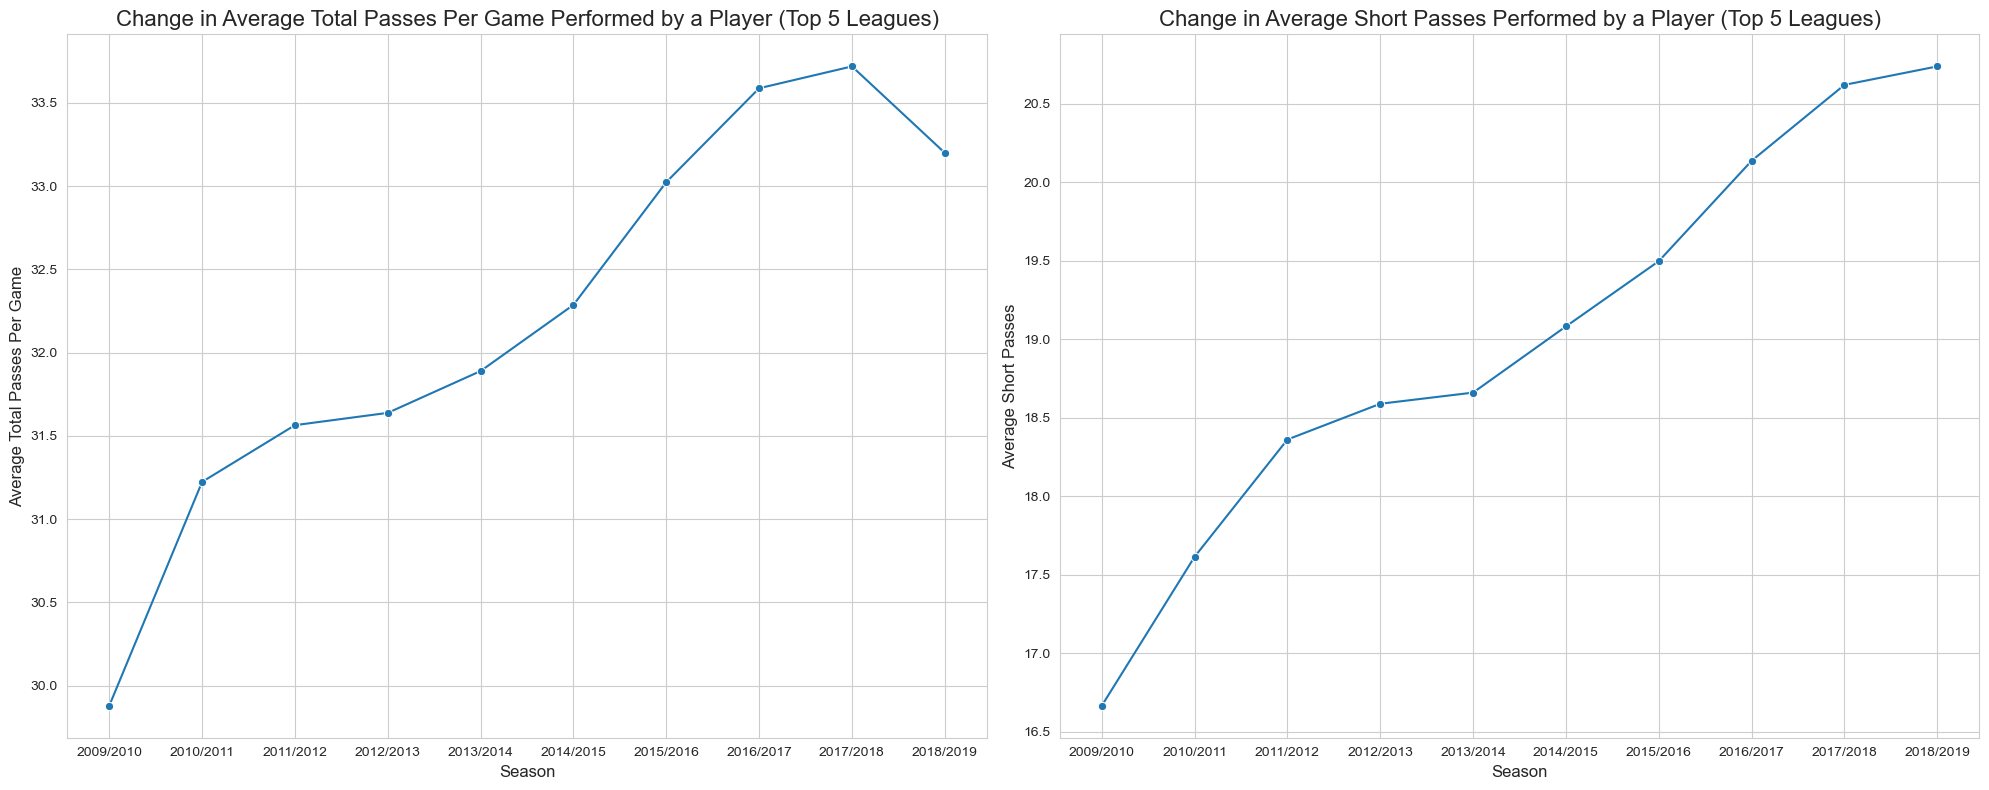

In [39]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Calculate the average total passes, short passes, and long balls per game for each season
average_stats_all_clubs = df.groupby('seasonName', as_index=False)[['totalPassesPerGame', 'shortPassAccurate']].mean()


# Plot the change in average total passes per game over time
sns.lineplot(x='seasonName', y='totalPassesPerGame', data=average_stats_all_clubs, marker='o', ax=axs[0])
axs[0].set_title('Change in Average Total Passes Per Game Performed by a Player (Top 5 Leagues)',fontsize=16)
axs[0].set_ylabel('Average Total Passes Per Game',fontsize=12)
axs[0].set_xlabel('Season',fontsize=12)

# Plot the change in average short passes over time
sns.lineplot(x='seasonName', y='shortPassAccurate', data=average_stats_all_clubs, marker='o', ax=axs[1])
axs[1].set_title('Change in Average Short Passes Performed by a Player (Top 5 Leagues)',fontsize=16)
axs[1].set_ylabel('Average Short Passes',fontsize=12)
axs[1].set_xlabel('Season',fontsize=12)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


- From these 2 plots, we can see that both the average total passes per game performed by a player and the average short passes performed by a player has increased significantly during this period, especially since the season of 2015/2016
- This could suggest that the style of play has become more possession-oriented over time, with players making more passes in each game and they prefer to perform more short passes, which is the main characteristic of this playstyle.

#### How possesion style affect football in general ?

First, we will see the change in number of average passes per game by position before and after the season 2015/2016

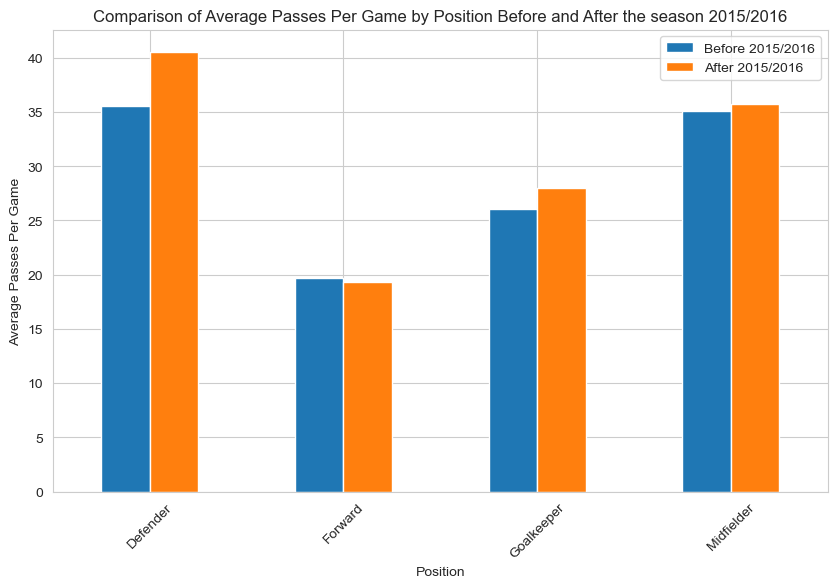

In [40]:
# Define the split season
split_season = '2015/2016'

# Split the data into two periods
before_2015 = df[df['seasonName'].isin(seasons[:seasons.index(split_season)])]
after_2015 = df[df['seasonName'].isin(seasons[seasons.index(split_season):])]

# Define the positions to include
positions = ['Defender', 'Forward', 'Midfielder', 'Goalkeeper']

# Filter the data to only include the defined positions
before_2015 = before_2015[before_2015['positionText'].isin(positions)]
after_2015 = after_2015[after_2015['positionText'].isin(positions)]

# Calculate the average total passes per game by position for each period
average_passes_before = before_2015.groupby('positionText')['totalPassesPerGame'].mean()
average_passes_after = after_2015.groupby('positionText')['totalPassesPerGame'].mean()

# Combine the data into one DataFrame
average_passes = pd.DataFrame({'Before 2015/2016': average_passes_before, 'After 2015/2016': average_passes_after})

# Create a grouped bar plot
average_passes.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Average Passes Per Game by Position Before and After the season 2015/2016')
plt.ylabel('Average Passes Per Game')
plt.xlabel('Position')
plt.legend(['Before 2015/2016', 'After 2015/2016'])
plt.xticks(rotation=45)
plt.show()

- We can see that except Foward, 3 other positions had to perform more passes per game
- This also bring a concept that, although not new, gain more interest from 2016 and has become a top criterion in today's big football teams: ball-playing defender and sweeper keeper. Which means that top teams want to distribute the ball right from their own half through their centre backs and goalkeeper.

Next we will see the change in the distance of the goal

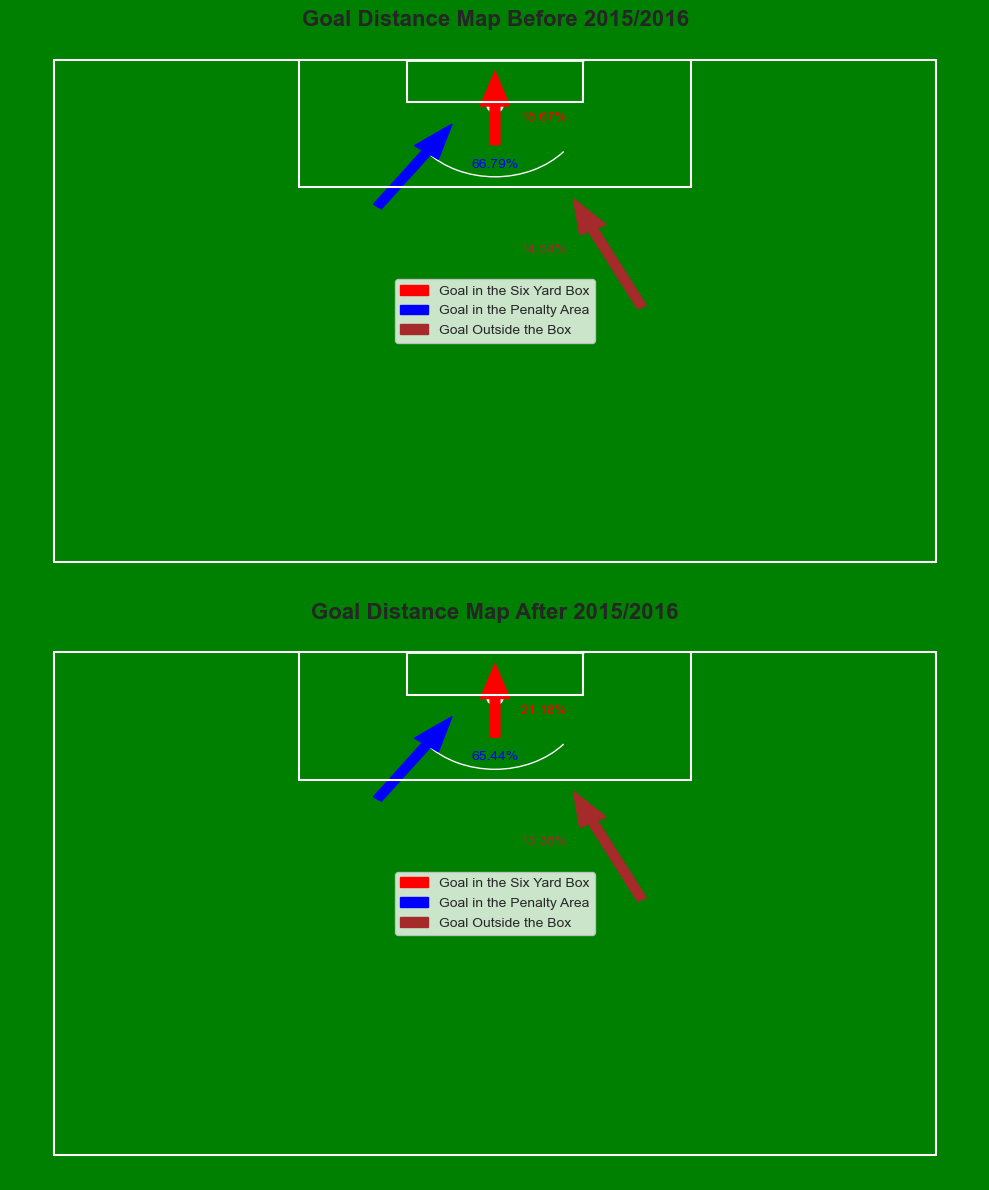

In [41]:

import matplotlib.patches as patches #patches is a module that contains various patches
# Convert the 'goalSixYardBox', 'goalPenaltyArea', 'goalObox', 'goalTotal_x' columns to numeric
df['goalSixYardBox'] = pd.to_numeric(df['goalSixYardBox'], errors='coerce')
df['goalPenaltyArea'] = pd.to_numeric(df['goalPenaltyArea'], errors='coerce')
df['goalObox'] = pd.to_numeric(df['goalObox'], errors='coerce')
df['goalTotal_x'] = pd.to_numeric(df['goalTotal_x'], errors='coerce')


# Calculate the percentage of each goal type for each period
percentage_goals_before = (before_2015[['goalSixYardBox', 'goalPenaltyArea', 'goalObox']].sum() / before_2015['goalTotal_x'].sum()) * 100
percentage_goals_after = (after_2015[['goalSixYardBox', 'goalPenaltyArea', 'goalObox']].sum() / after_2015['goalTotal_x'].sum()) * 100


# Function to draw a rotated half pitch
def draw_rotated_half_pitch(ax, percentages, title):
    # Set the color of the pitch
    fig.set_facecolor('green')
    
    # Pitch Outline & Centre Line
    ax.plot([0, 0], [0, 65], color="white")
    ax.plot([0, 90], [65, 65], color="white")
    ax.plot([90, 90], [65, 0], color="white")
    ax.plot([90, 0], [0, 0], color="white")

    # Right Penalty Area
    ax.plot([25, 25], [65, 48.5], color="white")
    ax.plot([25, 65], [48.5, 48.5], color="white")
    ax.plot([65, 65], [48.5, 65], color="white")

    # Right 6-yard Box
    ax.plot([36, 36], [65, 59.5], color="white")
    ax.plot([36, 54], [59.5, 59.5], color="white")
    ax.plot([54, 54], [59.5, 65], color="white")

    # Goal Frame
    ax.plot([36, 54], [65, 65], color="white", linewidth=2)

    # Prepare Circles
    rightPenSpot = patches.Circle((45, 59), 0.8, color="white")

    # Draw Circles
    ax.add_patch(rightPenSpot)

    # Prepare Arcs
    rightArc = patches.Arc((45, 59), height=18.3, width=18.3, angle=0, theta1=220, theta2=320, color="white")

    # Draw Arcs
    ax.add_patch(rightArc)

    # Tidy Axes
    ax.axis('off')

    # Set the background color to green
    ax.set_facecolor('green')

    # Draw arrows representing the shots
    ax.arrow(45, 54, 0, 5, color='red', width=1, label='Goal in the Six Yard Box')
    ax.arrow(33, 46, 5, 7, color='blue', width=1, label='Goal in the Penalty Area')
    ax.arrow(60, 33, -5, 10, color='brown', width=1, label='Goal Outside the Box')

    # Add the percentages as text
    ax.text(50, 57, f'{percentages["goalSixYardBox"]:.2f}%', color='red', ha='center')
    ax.text(45, 51, f'{percentages["goalPenaltyArea"]:.2f}%', color='blue', ha='center')
    ax.text(50, 40, f'{percentages["goalObox"]:.2f}%', color='brown', ha='center')

    # Add a legend
    ax.legend()

    # Add a title
    ax.set_title(title, fontsize=16, fontweight='bold')

# Create figure
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Draw the rotated half pitch for before and after 2015/2016
draw_rotated_half_pitch(axs[0], percentage_goals_before, 'Goal Distance Map Before 2015/2016')
draw_rotated_half_pitch(axs[1], percentage_goals_after, 'Goal Distance Map After 2015/2016')

# Show the plot
plt.tight_layout()
plt.show()

- From the plot we can see that there is not much change it the percentage of goal type. However, the increase in goal in the six yard box and the decrease in two other type show that a shift in tactics favoring more close-range shots. And players are likely to limit long shots or difficult shots to avoid losing control of the ball to the opponent.

We will compare the number of turnovers per game between two period. Turnover means when a player loses possession of ball to other team.

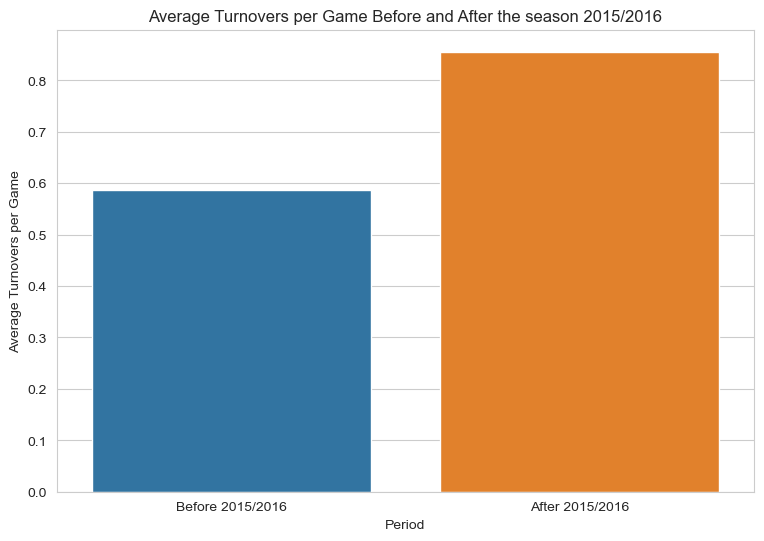

In [42]:
# Convert the 'turnover' column to numeric
df['turnover'] = pd.to_numeric(df['turnover'], errors='coerce')

# Calculate the average turnovers per game for each period
avg_turnover_before = before_2015['turnover'].mean()
avg_turnover_after = after_2015['turnover'].mean()

# Create a DataFrame for the average turnovers
avg_turnovers = pd.DataFrame({
    'Period': ['Before 2015/2016', 'After 2015/2016'],
    'Average Turnovers per Game': [avg_turnover_before, avg_turnover_after]
})

# Create a bar plot
plt.figure(figsize=(9, 6))
sns.barplot(x='Period', y='Average Turnovers per Game', data=avg_turnovers)
plt.title('Average Turnovers per Game Before and After the season 2015/2016')
plt.ylabel('Average Turnovers per Game')
plt.xlabel('Period')
plt.show()

- We can see that there is an increase in average turnovers after 2015/2016. This could be explained that many teams want to play high-pressing tactic to win the ball quickly after they losing possession, which help them to dominate the game more and not allow opponent to play the ball.

##### The Average Weight and Height of Footballers based on each Position

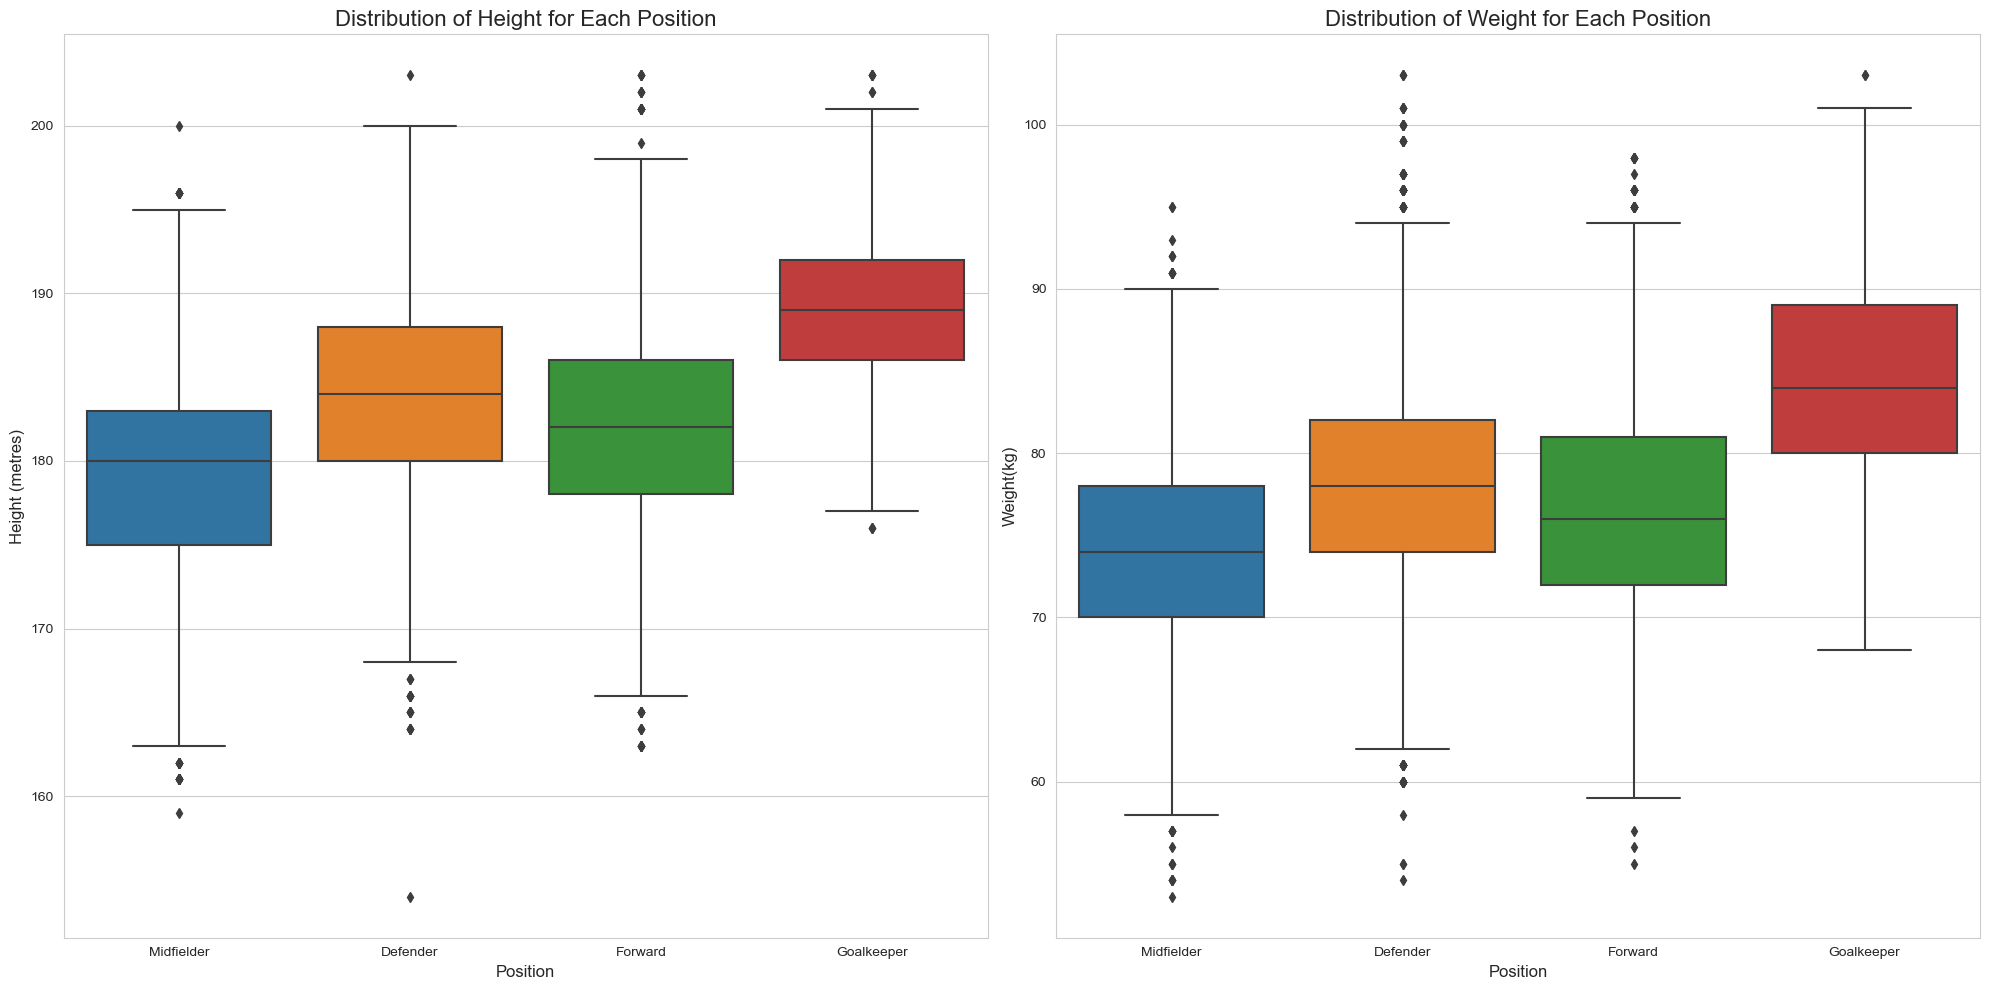

In [43]:
# Filter the data to only include the defined positions and players 
df = df[df['positionText'].isin(positions) & (df['height'] >= 100) & (df['weight'] > 0)]

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Create a boxplot of height for each position
sns.boxplot(x='positionText', y='height', data=df, ax=axs[0])
axs[0].set_title('Distribution of Height for Each Position', fontsize=16)
axs[0].set_xlabel('Position', fontsize=12)
axs[0].set_ylabel('Height (metres)', fontsize=12)

# Create a boxplot of weight for each position
sns.boxplot(x='positionText', y='weight', data=df, ax=axs[1])
axs[1].set_title('Distribution of Weight for Each Position', fontsize=16)
axs[1].set_xlabel('Position', fontsize=12)
axs[1].set_ylabel('Weight(kg)', fontsize=12)

plt.tight_layout()
plt.show()

From the boxplot we can conclude that:
- Goalkeepers tend to be the tallest and heaviest among all positions. This is because a greater height could be advantageous for goalkeepers when it comes to reaching high balls and saving goals.
- Defenders are generally tall and have a wide range of weights. This is because height can be beneficial for defending against aerial threats, and a higher weight could help in physical duels against opponents.
- Midfielders and Forwards have lower median heights and weights compared to Goalkeepers and Defenders. This can be due to the fact that these positions often require more agility and speed, which might be easier to achieve with a lower height and weight.

#### Correlation Heatmap

/var/folders/m6/g6s2c4_n1t59rxk474pzh7200000gn/T/ipykernel_98008/3022255377.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


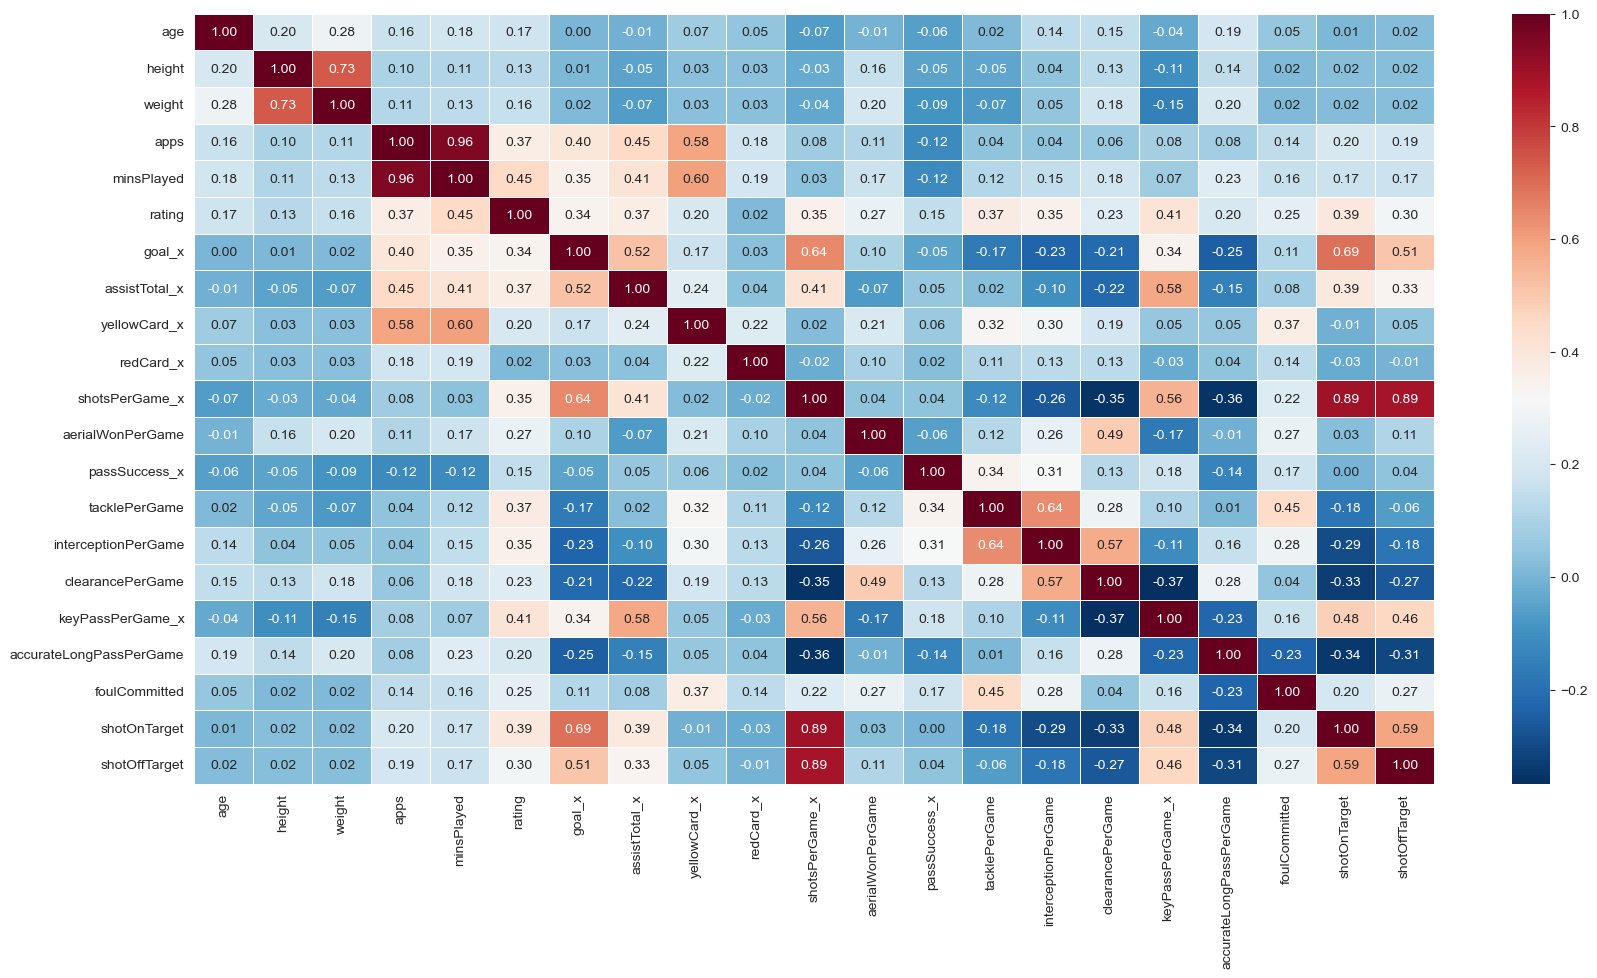

In [44]:
# read again the csv file with the cleaned data
df = pd.read_csv('cleaned_data.csv')

selected_columns = ['age', 'height', 'weight', 'apps', 'minsPlayed', 'rating', 'goal_x', 'assistTotal_x', 'yellowCard_x', 'redCard_x', 'shotsPerGame_x', 'aerialWonPerGame', 'passSuccess_x', 'tacklePerGame', 'interceptionPerGame', 'clearancePerGame', 'keyPassPerGame_x', 'accurateLongPassPerGame', 'foulCommitted', 'shotOnTarget', 'shotOffTarget']
# Calculate the correlation matrix
corr = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, cmap='RdBu_r')
plt.show()

- Weight vs Height: The correlation coefficient is 0.73 reveals a strong positive relationship between the weight and height of a player. 
- Shot on target vs goal: The correlation coefficient is 0.69, which means there is a positive relationship between the number of shot on target and the number of goal of a player. This suggest that a player must have a good ability to shot the ball precisely to score many goal
- Shot on target vs shot per game: The correlation coefficient is 0.89, as player shot more so the number of their shot on target will also increase
- Key pass per game vs shot per game: The correlation coefficient is 0.56, which mean in order to a striker can only perform many shot if they have good playmaker play beside them


#### Part 2: European football in the season of 2018/2019


First, we will take a look at the number of goals in some of Europe's top leagues in the 2018/2019 season. Since some players in leagues that are not in the top 5 leagues do not have the goal stat, we will calculate it by multiplying the number of goals per match by the number of matches they have played. 

To plot this, I have used the shapefile which I took from this website : https://data.dtu.dk/articles/dataset/Shapefile_of_European_countries/23686383/1

/var/folders/m6/g6s2c4_n1t59rxk474pzh7200000gn/T/ipykernel_98008/3271364256.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')
/var/folders/m6/g6s2c4_n1t59rxk474pzh7200000gn/T/ipykernel_98008/3271364256.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_division['COUNTRY'] = df['tournamentName'].map(league_country)
/var/folders/m6/g6s2c4_n1t59rxk474pzh7200000gn/T/ipykernel_98008/3271364256.py:59: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, country, league, goals in zip(europe.geometry.centroid.x

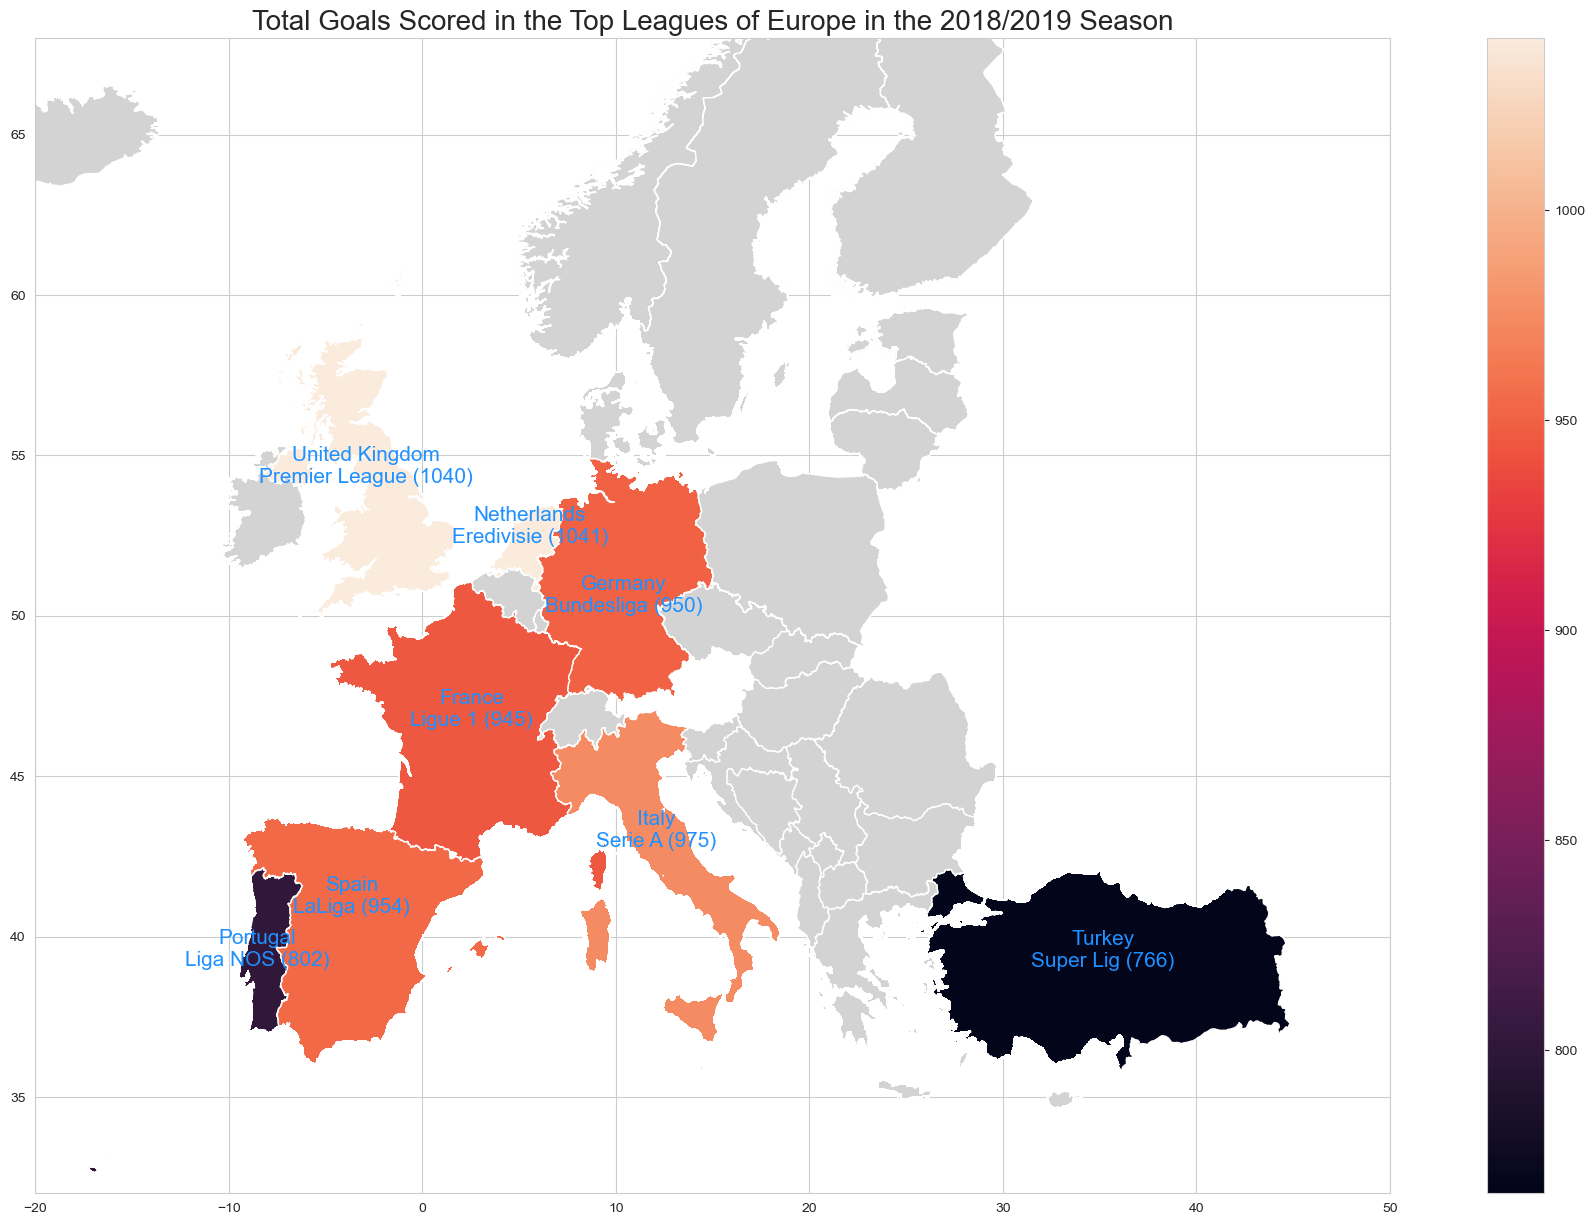

In [45]:
import geopandas as gpd  #geopandas is a library for working with geospatial data
import matplotlib.pyplot as plt

# read again the csv file with the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Convert goalTotal to numeric
df['goalTotal'] = pd.to_numeric(df['goalTotal'], errors='coerce')

# Calculate total goals by multiplying goalTotal by apps
df['total_goals'] = (df['goalTotal'] * df['apps']).round(0)

# Fill NaN values with 0 and convert to integer
df['total_goals'] = df['total_goals'].fillna(0).astype(int)

# Load the shapefile
europe = gpd.read_file('Europe_merged.shp')

# Create a dictionary mapping each league to its country
league_country = {
    'Premier League': 'United Kingdom',
    'LaLiga': 'Spain',
    'Bundesliga': 'Germany',
    'Serie A': 'Italy',
    'Ligue 1': 'France',
    'Supeliga': 'Denmark',
    'Super Lig': 'Turkey',
    'Eredivisie': 'Netherlands',
    'Liga NOS': 'Portugal',
}

# Define all leagues to consider in the database
top_leagues = ['Premier League', 'LaLiga', 'Bundesliga','Bundesliga II', 'Serie A', 'Ligue 1', 'Super Lig', 'Eredivisie', 'Championship', 'Liga NOS', 'Russina Premier League']

# Filter the data for the top leagues
df = df[df['tournamentName'].isin(top_leagues)]

# Filter the data for the 2018/2019 season and the leagues of interest
df_top_division = df[(df['seasonName'] == '2018/2019') & (~df['tournamentName'].isin(['Championship', 'Bundesliga II', 'Serie B']))]

# Map the leagues to their countries
df_top_division['COUNTRY'] = df['tournamentName'].map(league_country)

# Group the data by country and league, and sum the goals
grouped = df_top_division.groupby(['COUNTRY', 'tournamentName'])['total_goals'].sum().reset_index()

# Merge the grouped data with the Europe GeoDataFrame
europe = europe.merge(grouped, left_on='COUNTRY', right_on='COUNTRY', how='left')

# Plot the number of goals on a map of Europe
fig, ax = plt.subplots(1, 1, figsize=(25, 15)) 
europe.plot(column='total_goals', ax=ax, legend=True, missing_kwds={'color': 'lightgrey'})

# Set the x and y limits to zoom in on the map
ax.set_xlim([-20, 50])  
ax.set_ylim([32, 68])  

# Add country names and number of goals to the plot
for x, y, country, league, goals in zip(europe.geometry.centroid.x, europe.geometry.centroid.y, europe['COUNTRY'], europe['tournamentName'], europe['total_goals']):
    if pd.notna(goals):  # Only add a label if the country has a league
        # Adjust the position of the labels for Spain, Portugal and Germany
        if country == 'Spain':
            y += 0.5
        elif country == 'Portugal':
            y -= 0.5
        elif country == 'Germany':
            y -= 1
        ax.text(x, y, f'{country}\n{league} ({int(goals)})', fontsize=15, ha='center', color='dodgerblue')  
plt.title('Total Goals Scored in the Top Leagues of Europe in the 2018/2019 Season', fontsize=20)
plt.show()

- From the map, the Eredivisie and the Premier League are the two leagues which have the most goal, with 1041 and 1040, respectively. Meanwhile the Super Lig is the league with the least goal, with only 766 goals.
- The difference in goals between leagues may be due to the different quality of players and playing style in each league. And more specifically, the number of matches in each league is also different. 

Therefore, to find out which league is highly entertaining, we will compare the average number of goals per match of each league. We will also include some second division leagues of some countries into this.

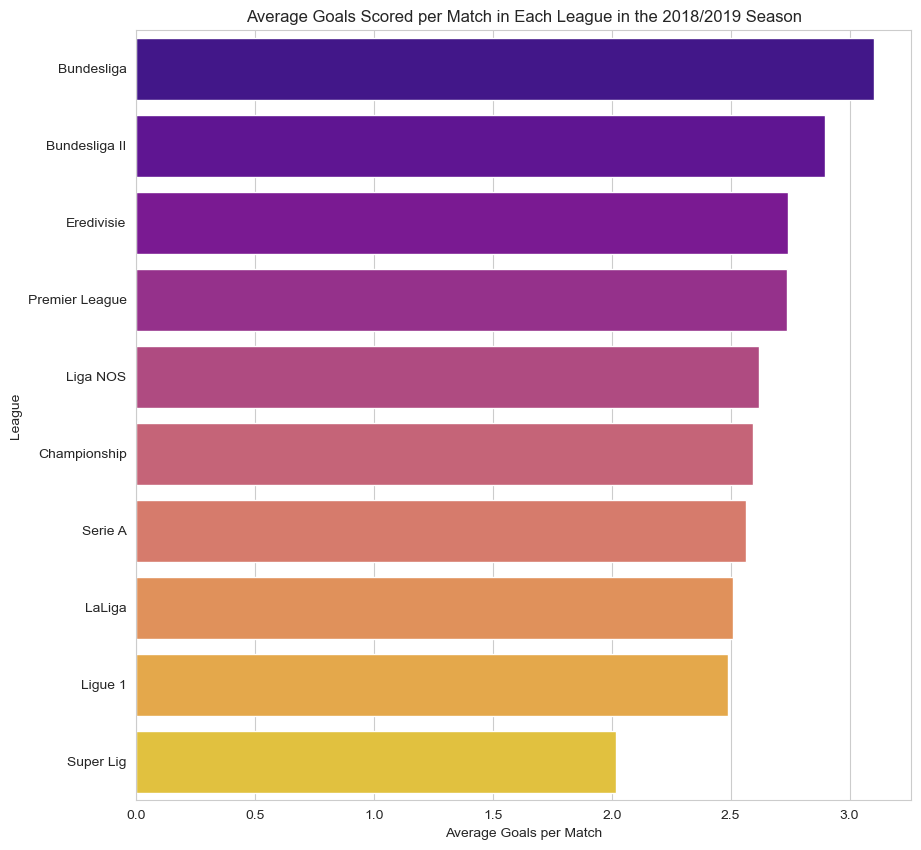

In [46]:
# Filter the data for the 2018/2019 season
df = df[df['seasonName'] == '2018/2019']

# Define all leagues to consider in the database
top_leagues = ['Premier League', 'LaLiga', 'Bundesliga','Bundesliga II', 'Serie A', 'Ligue 1', 'Super Lig', 'Eredivisie', 'Championship', 'Liga NOS']

# Filter the data for the top leagues
df = df[df['tournamentName'].isin(top_leagues)]

# Group the data by league and sum the goals
grouped_goals = df.groupby('tournamentName')['total_goals'].sum()

# Define the total number of matches for each league
total_matches = {
    'Premier League': 380,
    'LaLiga': 380,
    'Bundesliga': 306,
    'Bundesliga II': 306,
    'Serie A': 380,
    'Ligue 1': 380,
    'Super Lig': 380,
    'Eredivisie': 380,
    'Championship': 552,
    'Liga NOS': 306,
}

# Calculate the average goals per match
average_goals = grouped_goals / pd.Series(total_matches)

# Convert the Series to a DataFrame and reset the index
average_goals = average_goals.reset_index()
average_goals.columns = ['League', 'Average Goals per Match']

# Sort the DataFrame by 'Average Goals per Match' in descending order
average_goals = average_goals.sort_values('Average Goals per Match', ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x='Average Goals per Match', y='League', data=average_goals,palette='plasma')
plt.title('Average Goals Scored per Match in Each League in the 2018/2019 Season')
plt.show()

- From the plot, Bundesliga in Germany seems to be the most entertaining league, while Super Lig in Turkey is the least entertaning league in the season of 2018/2019

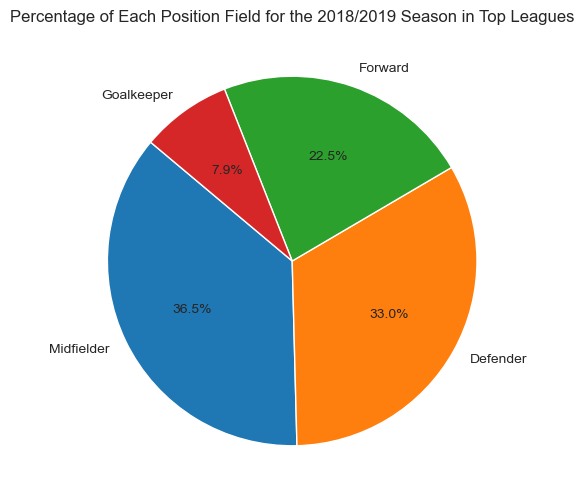

In [47]:
# Count the number of occurrences of each position
position_counts = df['positionText'].value_counts()

# Create a pie chart of the position counts
plt.figure(figsize=(10, 6))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Position Field for the 2018/2019 Season in Top Leagues')
plt.show()

- Midfielders (36.5%) and Defenders (33.0%) make up the majority of the positions. This could refer that these roles are important in team structure, possibly due to their responsibilities in both play-making and defensive plays.
- Forwards (22.5%) also hold a significant portion, which aligns with their crucial role in scoring goals.
- Goalkeepers (7.9%) have the smallest percentage, which is reasonable due to the fact that there is typically only one goalkeeper on the field per team at any given time.

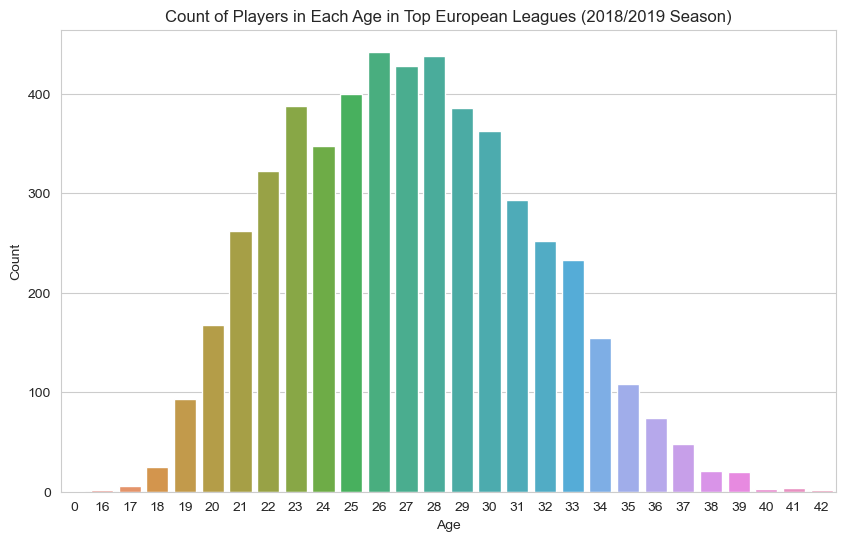

In [48]:
# Plot a countplot of the 'age' column
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df)
plt.title('Count of Players in Each Age in Top European Leagues (2018/2019 Season)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The majority of players is concentrated around the ages of 23 to 30, with a peak at the age of 26. This is the ideal age for a footballer as at this age, they already have enough experience and physical atrributes to play top football

#### Finding who is the sharpest striker in Europe ?
I have chose 5 best goal scorers in top 5 leagues in Europe and compare them based on two main factors indicating their efficiency to score:
- Goals per Shot on X-axis
- Goals per Shot on Target on Y-axis

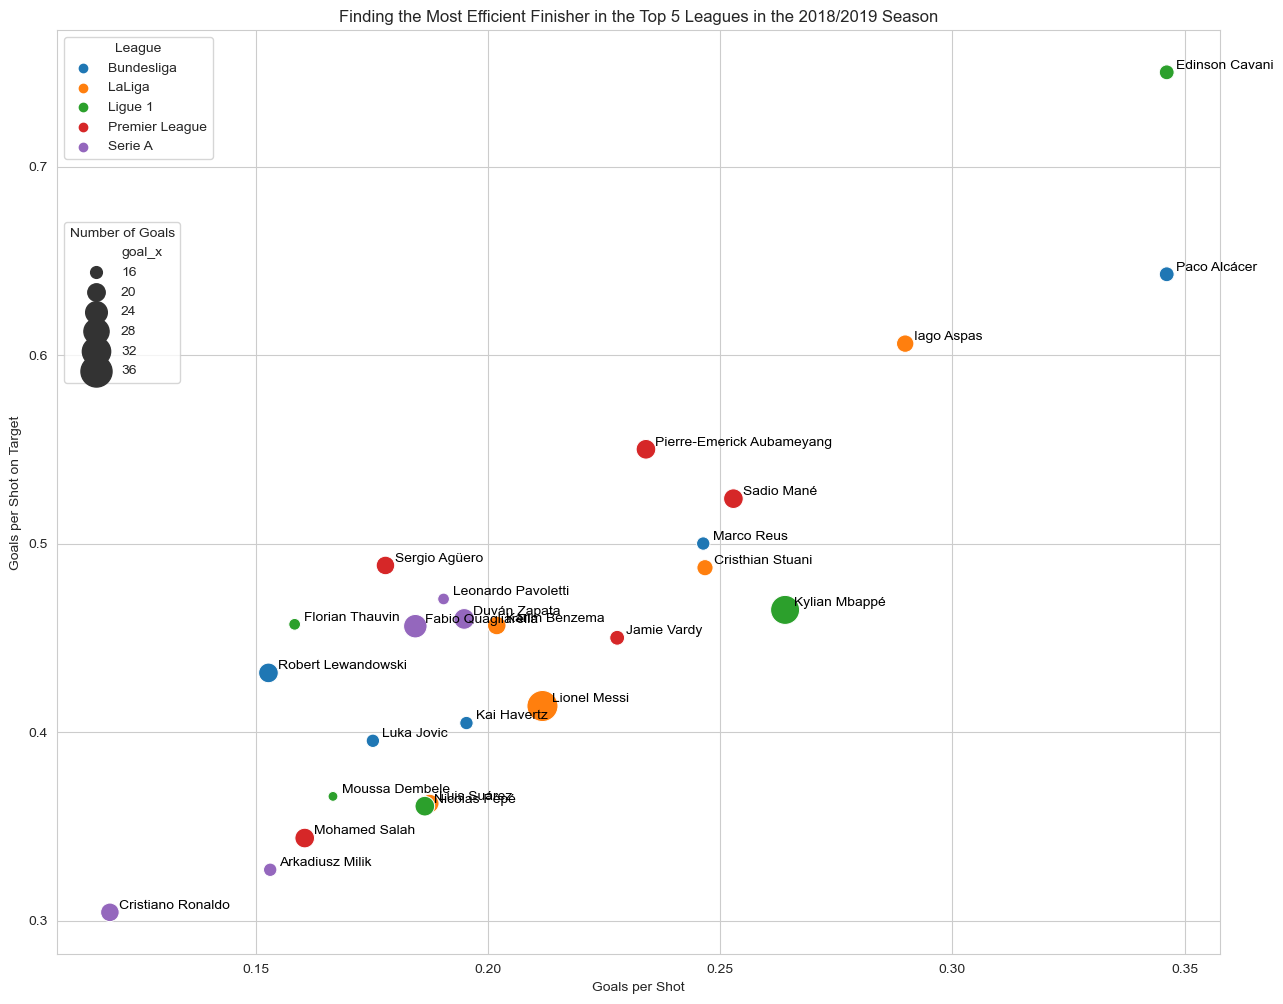

In [49]:
# Filter the data for the 2019/2020 season
df = df[df['seasonName'] == '2018/2019']

# Define the top 5 leagues
top_5_leagues = ['Premier League', 'LaLiga', 'Bundesliga', 'Serie A', 'Ligue 1']

# Filter the data for the top 5 leagues
df = df[df['tournamentName'].isin(top_5_leagues)]

# Convert the columns to numeric
df['goalTotal_x'] = pd.to_numeric(df['goalTotal_x'], errors='coerce')
df['shotsTotal_y'] = pd.to_numeric(df['shotsTotal_y'], errors='coerce')
df['shotOnTarget'] = pd.to_numeric(df['shotOnTarget'], errors='coerce')
df['goal_x'] = pd.to_numeric(df['goal_x'], errors='coerce')


# Calculate goals per shot and goals per shot on target
df['goals_per_shot'] = df['goalTotal_x'] / df['shotsTotal_y']
df['goals_per_shot_on_target'] = df['goalTotal_x'] / df['shotOnTarget']

# Filter the data for the top 5 most scored players in each league
top_scorers = df.groupby('tournamentName').apply(lambda x: x.nlargest(5, 'goal_x')).reset_index(drop=True)

# Create a scatter plot
plt.figure(figsize=(15, 12))
scatter = sns.scatterplot(data=top_scorers, x='goals_per_shot', y='goals_per_shot_on_target', hue='tournamentName', size='goal_x', sizes=(50, 500))

# Annotate the scatter plot with the names of the players
for i in range(top_scorers.shape[0]):
    plt.text(x=top_scorers.goals_per_shot[i]+0.002, y=top_scorers.goals_per_shot_on_target[i]+0.002, s=top_scorers.name[i], fontdict=dict(color='black',size=10))

plt.xlabel('Goals per Shot')
plt.ylabel('Goals per Shot on Target')
plt.title('Finding the Most Efficient Finisher in the Top 5 Leagues in the 2018/2019 Season')

# Get the handles and labels of the current legend
handles, labels = plt.gca().get_legend_handles_labels()

# Create a new legend for the color
color_legend = plt.legend(handles=handles[1:6], labels=labels[1:6], title='League', loc='upper left', bbox_to_anchor=(0, 1))

# Add the color legend manually to the plot
plt.gca().add_artist(color_legend)

# Create a new legend for the size
plt.legend(handles=handles[6:], labels=labels[6:], title='Number of Goals', loc='upper left', bbox_to_anchor=(0, 0.8))

plt.show()

- In terms of shooting ability, it seems that Edinson Cavani and Paco Alcacer are the two best strikers, although their number of goals is not high. While Cristiano Ronaldo is the striker with the worst shooting ability in the list
- Strikers with high number of goal like Kylian Mbappe and Lionel Messi both need many shots to score a goal. Because they play for top teams in Europe so that they will have a lot of chance to shoot and receive many great key passes from their teammates.

#### Finding out who the best playmaker in Europe ?
I visualizing these metrics as x-asis and y-asis to identify;
- Total key passes per games: The final pass from a player to their teammate who then makes an attempt on Goal 
- Accurate though ball per games: a pass into open space between two defenders for an attacker to receive the ball behind the defenders.

In this scatterplot I will only choose player with over 1500 minutes of play time

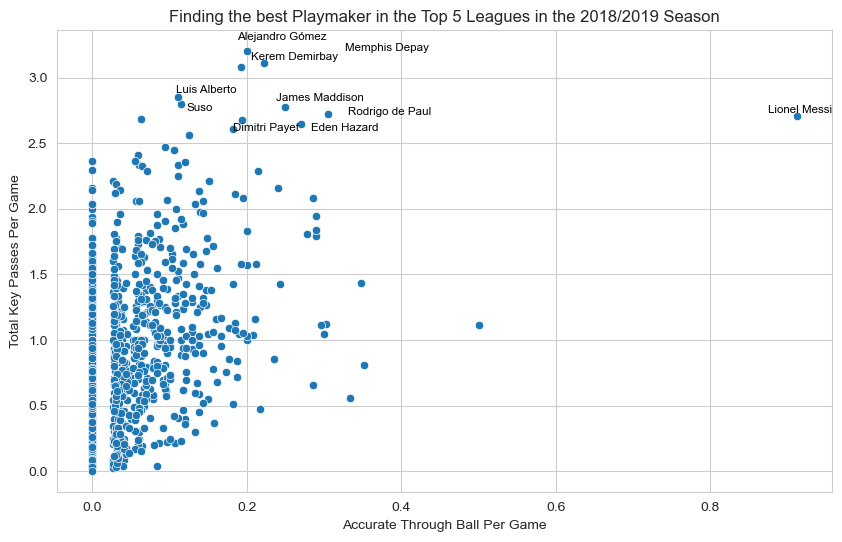

In [50]:
from adjustText import adjust_text #adjustText is a library to adjust text points 

# Filter the data for players with over 1500 minutes played
df = df[df['minsPlayed'] > 1500]

# Convert the columns to numeric
df['accurateThroughBallPerGame'] = pd.to_numeric(df['accurateThroughBallPerGame'], errors='coerce')
df['keyPassesTotal'] = pd.to_numeric(df['keyPassesTotal'], errors='coerce')

# Create a new column for the sum of 'accurateThroughBallPerGame' and 'keyPassesTotal'
df['sum_stats'] = df['accurateThroughBallPerGame'] + df['keyPassesTotal']

# Get the names of the 10 players with the highest sum of 'accurateThroughBallPerGame' and 'keyPassesTotal'
top_players = df.nlargest(10, 'sum_stats')['name']

# Create a scatter plot of 'accurateThroughBallPerGame' and 'keyPassesTotal'
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='accurateThroughBallPerGame', y='keyPassesTotal', data=df)

# Annotate the scatter plot with the names of the top players
texts = []
for i, player in df.iterrows():
    if player['name'] in top_players.values:
        texts.append(scatter.text(player['accurateThroughBallPerGame'], player['keyPassesTotal'], player['name'], horizontalalignment='left', size='small', color='black'))

adjust_text(texts)

plt.title('Finding the best Playmaker in the Top 5 Leagues in the 2018/2019 Season')
plt.xlabel('Accurate Through Ball Per Game')
plt.ylabel('Total Key Passes Per Game')
plt.show()

- In the scatterplot, we have already seen the name of some of the best individual in playmaking.
- Lionel Messi has proved that why he is the best player in the world when his overall performance in both of these stats is so superior to the rest

#### Finding who is the best defender in Europe ?
I will use these metrics:
- Aeriel Won Percentage (y-asis)
- Tackle Won Percentage (x-asis)
- The number of times being dribble past per game (the size of the dot)

I will only choose defenders who have more than 1500 minutes of play time

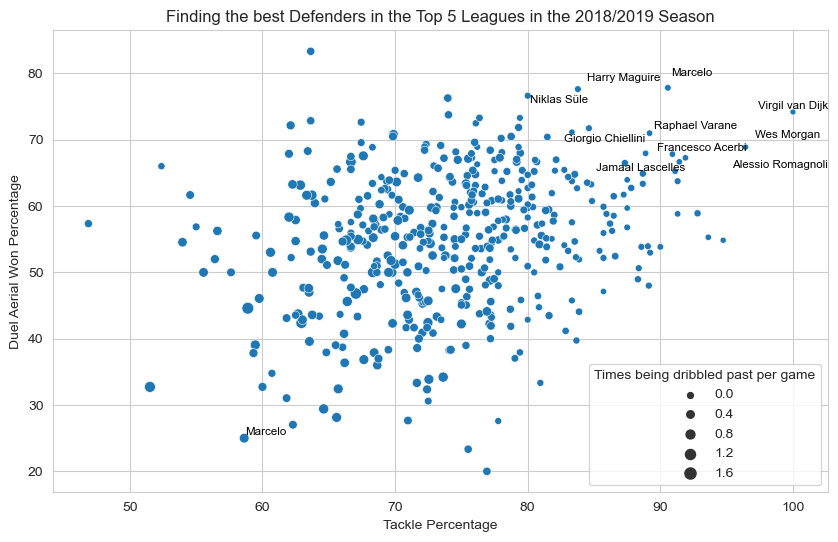

In [51]:

# Filter the data for players who are defenders and have played more than 1500 minutes
df = df[(df['positionText'] == 'Defender') & (df['minsPlayed'] > 1500)]

# Convert the columns to numeric
df['tackleWonTotal'] = pd.to_numeric(df['tackleWonTotal'], errors='coerce')
df['tackleTotalAttempted'] = pd.to_numeric(df['tackleTotalAttempted'], errors='coerce')
df['duelAerialWon'] = pd.to_numeric(df['duelAerialWon'], errors='coerce')

# Calculate the tackle percentage and duel aerial won percentage
df['tackle_percentage'] = df['tackleWonTotal'] / df['tackleTotalAttempted'] * 100
df['duel_aerial_won_percentage'] = df['duelAerialWon'] / df['duelAerialTotal'] * 100

# Create a new column for the sum of 'tackle_percentage' and 'duel_aerial_won_percentage' 
df['sum_stats'] = (df['tackle_percentage'] + df['duel_aerial_won_percentage']) 

# Get the names of the 10 players with the highest 'sum_stats'
top_players = df.nlargest(10, 'sum_stats')['name']

# Create a scatter plot of 'tackle_percentage' and 'duel_aerial_won_percentage'
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='tackle_percentage', y='duel_aerial_won_percentage', size='wasDribbledPerGame', data=df)

# Annotate the scatter plot with the names of the top players
texts = []
for i, player in df.iterrows():
    if player['name'] in top_players.values:
        texts.append(scatter.text(player['tackle_percentage'], player['duel_aerial_won_percentage'], player['name'], horizontalalignment='left', size='small', color='black'))

adjust_text(texts)

plt.title('Finding the best Defenders in the Top 5 Leagues in the 2018/2019 Season')
plt.legend(title='Times being dribbled past per game')
plt.xlabel('Tackle Percentage')
plt.ylabel('Duel Aerial Won Percentage')
plt.show()

- The name of top 10 defenders in Europe is shown on the top right corner of the scatterplot. All 10 players are centre-backs.
- Virgil Van Dijk appears to be the best of all when he is the one who is closest to the right corner. And he is also one of the players who have not been dribbled past in the whole 2018/2019 season.

#### Compare the two best players in Europe with others in the 2018/2019 season
Let's take a look at the parameters of the two players leading the Ballon d'or race in 2019, Lionel Messi and Virgil van Dijk, compared to the average of other players with the same position in the top 5 European leagues. This will answer why they are the two best players in Europe in 2019

/var/folders/m6/g6s2c4_n1t59rxk474pzh7200000gn/T/ipykernel_98008/2842551028.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


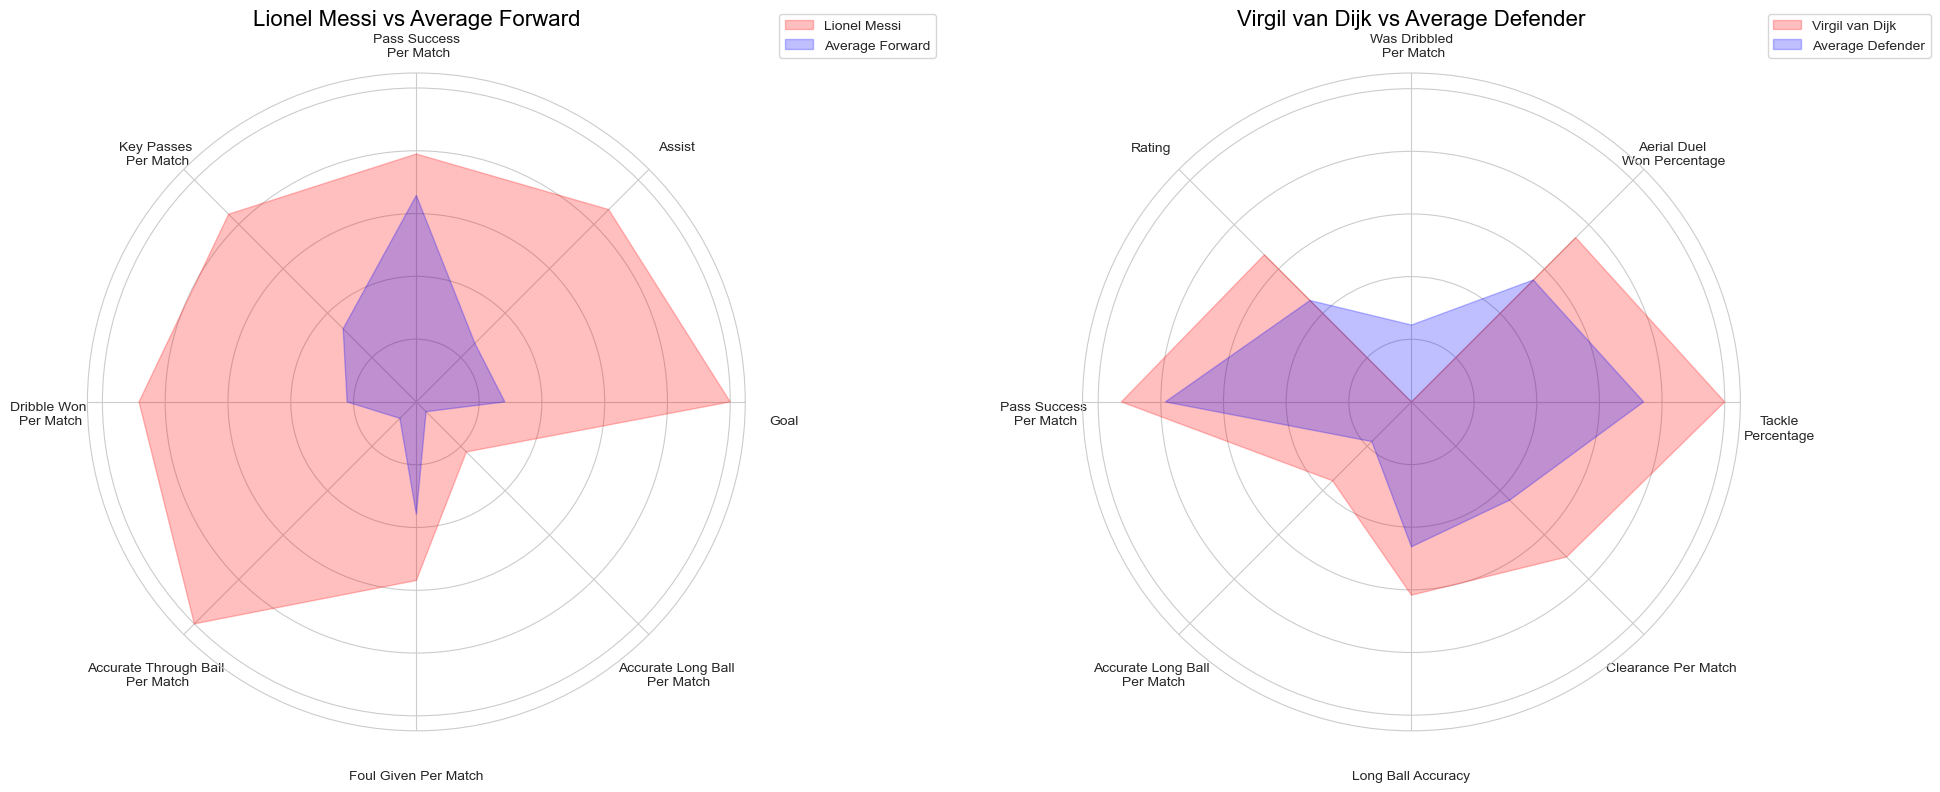

In [52]:
# read again the csv file with the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Filter the data for the 2019/2020 season
df = df[df['seasonName'] == '2018/2019']

# Define the top 5 leagues
top_5_leagues = ['Premier League', 'LaLiga', 'Bundesliga', 'Serie A', 'Ligue 1']

# Filter the data for the top 5 leagues
df = df[df['tournamentName'].isin(top_5_leagues)]

# Convert the columns to numeric
df['goalTotal_x'] = pd.to_numeric(df['goalTotal_x'], errors='coerce')
df['shotsTotal_y'] = pd.to_numeric(df['shotsTotal_y'], errors='coerce')
df['shotOnTarget'] = pd.to_numeric(df['shotOnTarget'], errors='coerce')
df['goal_x'] = pd.to_numeric(df['goal_x'], errors='coerce')

# Calculate the new stats
df['tacklePercentage'] = df['tackleWonTotal'] / df['tackleTotalAttempted'] * 100
df['duelAerialWonPercentage'] = df['duelAerialWon'] / df['duelAerialTotal'] * 100
df['longBallAccuracy'] = df['passLongBallAccurate'] / (df['passLongBallAccurate'] + df['passLongBallInaccurate']) * 100

# Convert each stat to numeric
for stat in ['goal_x', 'assistTotal', 'passSuccess_x', 'keyPassesTotal', 'dribbleWonPerGame', 'accurateThroughBallPerGame', 'foulGiven', 'passLongBallAccurate','tacklePercentage', 'duelAerialWonPercentage', 'wasDribbledPerGame', 'rating', 'passSuccess_x', 'passLongBallAccurate', 'longBallAccuracy', 'clearanceTotal']:
    df[stat] = pd.to_numeric(df[stat], errors='coerce')

# Define a dictionary to map the original labels to the new labels
label_mapping = {
    'goal_x': '\nGoal',
    'assistTotal': 'Assist',
    'passSuccess_x': 'Pass Success\n Per Match',
    'keyPassesTotal': 'Key Passes\n Per Match',
    'dribbleWonPerGame': 'Dribble Won\n Per Match',
    'accurateThroughBallPerGame': 'Accurate Through Ball\n Per Match',
    'foulGiven': 'Foul Given Per Match',
    'passLongBallAccurate': 'Accurate Long Ball\n Per Match',
    'tacklePercentage': '\nTackle\nPercentage',
    'duelAerialWonPercentage': 'Aerial Duel\n Won Percentage',
    'wasDribbledPerGame': 'Was Dribbled\n Per Match',
    'rating': 'Rating',
    'passSuccess_x': 'Pass Success\n Per Match',
    'passLongBallAccurate': 'Accurate Long Ball\n Per Match',
    'longBallAccuracy': 'Long Ball Accuracy',
    'clearanceTotal': 'Clearance Per Match'
}
# Create a function to create a radar chart
def create_radar_chart(df, player_name, position, stats, ax):
    # Filter players who have played more than 1500 minutes and are of the specified position
    filtered_df = df[(df['minsPlayed'] > 1500) & (df['positionText'].isin([position]))]

    # Get player's stats
    player_stats = df[df['name'] == player_name].iloc[0]

    # Calculate the average stats for these players
    average_stats = filtered_df[stats].mean()

    # Normalize the stats for the player and the average player
    for stat in stats:
        min_value = df[stat].min()
        max_value = df[stat].max()
        player_stats[stat] = (player_stats[stat] - min_value) / (max_value - min_value)
        average_stats[stat] = (average_stats[stat] - min_value) / (max_value - min_value)

    # Number of variables 
    num_vars = len(stats)

    # Split the circle into even parts and save the angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    values_player = player_stats[stats].values.flatten().tolist() # player's stats
    values_player += values_player[:1] 
    angles += angles[:1]
    values_avg = average_stats.values.flatten().tolist() # average stats
    values_avg += values_avg[:1]

    # Add player's stats to the chart.
    ax.fill(angles, values_player, color='red', alpha=0.25)

    # Add average stats to the chart.
    ax.fill(angles, values_avg, color='blue', alpha=0.25)

    # Add labels to the plot
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([label_mapping[stat] for stat in stats], fontsize=10, verticalalignment='top', position=(0,-0.06))

    # Add legend and title
    ax.legend([player_name, 'Average ' + position], loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.set_title(player_name + ' vs Average ' + position, color = 'black', fontsize=16)

# Create figure and polar subplots
fig, axs = plt.subplots(figsize=(20, 8), nrows=1, ncols=2, subplot_kw=dict(polar=True))

# Create radar chart for Messi
create_radar_chart(df, 'Lionel Messi', 'Forward', ['goal_x', 'assistTotal', 'passSuccess_x', 'keyPassesTotal', 'dribbleWonPerGame', 'accurateThroughBallPerGame', 'foulGiven', 'passLongBallAccurate'], axs[0])

# Create radar chart for Van Dijk
create_radar_chart(df, 'Virgil van Dijk', 'Defender', ['tacklePercentage', 'duelAerialWonPercentage', 'wasDribbledPerGame', 'rating', 'passSuccess_x', 'passLongBallAccurate', 'longBallAccuracy', 'clearanceTotal'], axs[1])

# Show plot
plt.tight_layout()
plt.show()

- We can see that messi is superior in every index compared to the average of other players in Europe. That's why he won the European Ballon d'or in that year
- Virgil van Dijk also has an incredible season too with very superior stats compare to other defenders. He is also a very modern centre-back, not only good at defending but also the ability of passing the ball was also superb too.

### <font color='green'>Conclusion</font>

- In this analysis, we have explored many sides of European football through the period of 10 years starting from the season of 2009/2010 to 2018/2019. 
- Throught this report, we can see how football has developed through the years based on the statistics and have a difference look at this sport through data
- We have also found some talented players based on their statistics and prove why they are in the list of the best player in Europe
- The purpose of this report is to show that data can provide many different insights into the sport with the most fans in the world, as well as show the effectiveness of using data to improve the quality of the team tactics, and players